In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pydicom
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import cv2 as cv
import seaborn as sns
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# DataPath of DCIM Image (PPMI MRI)
trainImages = "./Data/Train"
testImages  = "./Data/Test"

In [4]:
label_dict = {
    'Control':0,
    'PD':1
}

In [5]:
def readTrainingData(filePath):
    image_data=[]
    labels = []
    folders = os.listdir(filePath)
    print(folders)
    for ix in folders:
      path = os.path.join(filePath,ix)
      for im in os.listdir(path):
        img = pydicom.dcmread(os.path.join(path,im))
        img_array = img.pixel_array
        img_array = cv.resize(img_array,(512,512))
        image_data.append(img_array)
        labels.append(label_dict[ix])
    return image_data,labels

In [6]:
def readTestingData(filePath):
    image_data=[]
    labels = []
    folders = os.listdir(filePath)
    print(folders)
    for ix in folders:
      path = os.path.join(filePath,ix)
      for im in os.listdir(path):
        img = pydicom.dcmread(os.path.join(path,im))
        img_array = img.pixel_array
        img_array = cv.resize(img_array,(512,512))
        image_data.append(img_array)
        labels.append(label_dict[ix])
    return image_data,labels

In [7]:
def arrayConversion(data,label):
    x_train = np.array(data)
    y_train = np.array(label)

    print(x_train.shape,y_train.shape)
    
    return x_train,y_train

In [8]:
def categoricalConversion(y_train):
    y_train = np_utils.to_categorical(y_train)
    print(y_train.shape)
    return y_train

In [9]:
def CNNModelwithoutBatchNormalization():
    model = Sequential()


    model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(512,512,1), activation='relu',kernel_regularizer=l2(0.01)))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(512,512,1), activation='relu',kernel_regularizer=l2(0.01)))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(512,512,1), activation='relu',kernel_regularizer=l2(0.01)))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(512,512,1), activation='relu',kernel_regularizer=l2(0.01)))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(512,512,1), activation='relu',kernel_regularizer=l2(0.01)))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(512,512,1), activation='relu',kernel_regularizer=l2(0.01)))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(224))
    model.add(Activation('relu'))

    model.add(Dropout(0.5))

    model.add(Dense(2))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

In [10]:
 def CNNLeNet5():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(512,512, 1)))
    model.add(MaxPool2D(strides=2))
    model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
    model.add(MaxPool2D(strides=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

In [11]:
def CNNModelwithBatchNormalization():
    model = Sequential()


    model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(512,512,1), activation='relu',kernel_regularizer=l2(0.01)))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(512,512,1), activation='relu',kernel_regularizer=l2(0.01)))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(512,512,1), activation='relu',kernel_regularizer=l2(0.01)))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(512,512,1), activation='relu',kernel_regularizer=l2(0.01)))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(512,512,1), activation='relu',kernel_regularizer=l2(0.01)))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(512,512,1), activation='relu',kernel_regularizer=l2(0.01)))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(224))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dropout(0.5))

    model.add(Dense(2))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

In [12]:
# Training CNN WithBatch Model
train_data,train_labels = readTrainingData(trainImages)
x_train,y_train = arrayConversion(train_data,train_labels)
y_train = categoricalConversion(y_train)
model = CNNModelwithBatchNormalization()
summary = True
if summary:
    print(model.summary())
filepath="./savedModel/parkinsons_detection_cnnbatch.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=3)
callbacks_list = [checkpoint]
hist = model.fit(x_train,y_train,
                    shuffle = True,
                    batch_size=32,
                    epochs = 25,
                    validation_split = 0.10,callbacks=callbacks_list)

['Control', 'PD']
(1564, 512, 512) (1564,)
(1564, 2)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 ma

Epoch 17/25
44/44 [==============================] - ETA: 0s - loss: 0.2124 - accuracy: 0.9993
Epoch 17: val_loss did not improve from 0.59885
44/44 [==============================] - 122s 3s/step - loss: 0.2124 - accuracy: 0.9993 - val_loss: 0.6627 - val_accuracy: 0.9745
Epoch 18/25
44/44 [==============================] - ETA: 0s - loss: 0.2060 - accuracy: 0.9979
Epoch 18: val_loss did not improve from 0.59885
44/44 [==============================] - 116s 3s/step - loss: 0.2060 - accuracy: 0.9979 - val_loss: 0.6699 - val_accuracy: 0.9363
Epoch 19/25
44/44 [==============================] - ETA: 0s - loss: 0.1948 - accuracy: 0.9986
Epoch 19: val_loss did not improve from 0.59885
44/44 [==============================] - 109s 2s/step - loss: 0.1948 - accuracy: 0.9986 - val_loss: 0.6541 - val_accuracy: 0.9554
Epoch 20/25
44/44 [==============================] - ETA: 0s - loss: 0.1904 - accuracy: 0.9979
Epoch 20: val_loss did not improve from 0.59885
44/44 [==============================]

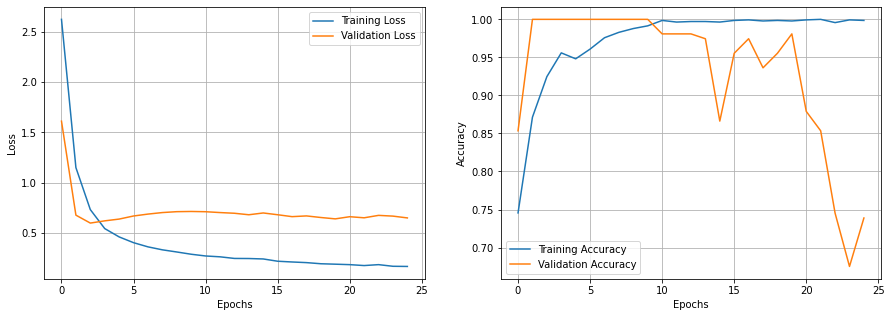

In [13]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

['Control', 'PD']
(522, 512, 512) (522,)
(522, 2)
17/17 [==============================] - 12s 705ms/step - loss: 0.6357 - accuracy: 0.7586
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       252
           1       0.74      0.83      0.78       270

    accuracy                           0.76       522
   macro avg       0.76      0.76      0.76       522
weighted avg       0.76      0.76      0.76       522

[[172  80]
 [ 46 224]]


<AxesSubplot:>

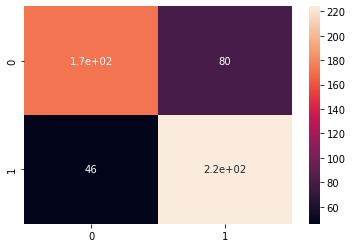

In [14]:
test_data,test_labels = readTrainingData(testImages)
x_test,y_test = arrayConversion(test_data,test_labels)
y_test = categoricalConversion(y_test)
model.evaluate(x_test,y_test)
predictions = model.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)
print(classification_report(test_labels, pred))
print(confusion_matrix(test_labels, pred))
sns.heatmap(confusion_matrix(test_labels, pred), annot=True)

In [16]:
img = pydicom.dcmread(r"C:\Nikhil drive\Mtech\mini project\Data\Test\Control\PPMI_3201_MR_axial_spgr_br_raw_20110318145751739_32_S101957_I224304.dcm")
img_array = img.pixel_array
img_array = cv.resize(img_array,(512,512))
model_out = model.predict(img_array.reshape(1,512,512))[0]
     
if np.argmax(model_out) == 1: str_label ='Parkinsons'
else: str_label ='No Parkinsons'
print("The predicted result is ", str_label)

The predicted result is  No Parkinsons


In [17]:
# Training CNN Without Batch Model
train_data,train_labels = readTrainingData(trainImages)
x_train,y_train = arrayConversion(train_data,train_labels)
y_train = categoricalConversion(y_train)
model = CNNModelwithoutBatchNormalization()
summary = True
if summary:
    print(model.summary())
filepath="./savedModel/parkinsons_detection_cnn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=3)
callbacks_list = [checkpoint]
hist = model.fit(x_train,y_train,
                    shuffle = True,
                    batch_size=32,
                    epochs = 25,
                    validation_split = 0.10,callbacks=callbacks_list)

['Control', 'PD']
(1564, 512, 512) (1564,)
(1564, 2)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 510, 510, 16)      160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 255, 255, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 

44/44 [==============================] - ETA: 0s - loss: 1.2203 - accuracy: 0.9922
Epoch 17: val_loss did not improve from 1.65384
44/44 [==============================] - 122s 3s/step - loss: 1.2203 - accuracy: 0.9922 - val_loss: 2.3163 - val_accuracy: 0.7070
Epoch 18/25
44/44 [==============================] - ETA: 0s - loss: 1.1438 - accuracy: 0.9979
Epoch 18: val_loss did not improve from 1.65384
44/44 [==============================] - 106s 2s/step - loss: 1.1438 - accuracy: 0.9979 - val_loss: 2.1668 - val_accuracy: 0.7707
Epoch 19/25
44/44 [==============================] - ETA: 0s - loss: 1.0859 - accuracy: 0.9929
Epoch 19: val_loss did not improve from 1.65384
44/44 [==============================] - 102s 2s/step - loss: 1.0859 - accuracy: 0.9929 - val_loss: 2.2969 - val_accuracy: 0.7834
Epoch 20/25
44/44 [==============================] - ETA: 0s - loss: 1.0314 - accuracy: 0.9964
Epoch 20: val_loss improved from 1.65384 to 1.55859, saving model to ./savedModel\parkinsons_detec

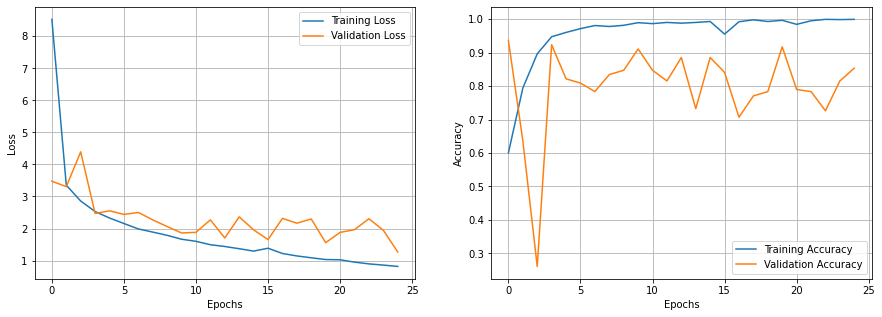

In [18]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

['Control', 'PD']
(522, 512, 512) (522,)
(522, 2)
17/17 [==============================] - 9s 492ms/step - loss: 3.0206 - accuracy: 0.7165
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       252
           1       0.72      0.73      0.73       270

    accuracy                           0.72       522
   macro avg       0.72      0.72      0.72       522
weighted avg       0.72      0.72      0.72       522

[[176  76]
 [ 72 198]]


<AxesSubplot:>

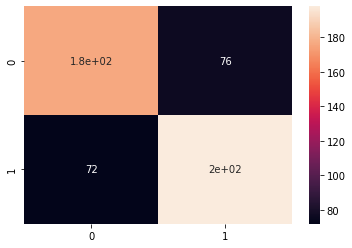

In [19]:
test_data,test_labels = readTrainingData(testImages)
x_test,y_test = arrayConversion(test_data,test_labels)
y_test = categoricalConversion(y_test)
model.evaluate(x_test,y_test)
predictions = model.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)
print(classification_report(test_labels, pred))
print(confusion_matrix(test_labels, pred))
sns.heatmap(confusion_matrix(test_labels, pred), annot=True)

In [20]:
img = pydicom.dcmread(r"C:\Nikhil drive\Mtech\mini project\Data\Test\Control\PPMI_3201_MR_axial_spgr_br_raw_20110318145751801_30_S101957_I224304.dcm")
img_array = img.pixel_array
img_array = cv.resize(img_array,(512,512))
model_out = model.predict(img_array.reshape(1,512,512))[0]
     
if np.argmax(model_out) == 1: str_label ='Parkinsons'
else: str_label ='No Parkinsons'
print("The predicted result is ", str_label)

The predicted result is  No Parkinsons


In [21]:

# Training CNNLeNet5()
train_data,train_labels = readTrainingData(trainImages)
x_train,y_train = arrayConversion(train_data,train_labels)
y_train = categoricalConversion(y_train)
model = CNNLeNet5()
summary = True
if summary:
    print(model.summary())
filepath="./savedModel/parkinsons_detection_LeNet.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=3)
callbacks_list = [checkpoint]
hist = model.fit(x_train,y_train,
                    shuffle = True,
                    batch_size=32,
                    epochs = 2,
                    validation_split = 0.10,callbacks=callbacks_list)

['Control', 'PD']
(1564, 512, 512) (1564,)
(1564, 2)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 512, 512, 32)      832       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 256, 256, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 252, 252, 48)      38448     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 126, 126, 48)     0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 762048)            0         
                                                                 
 

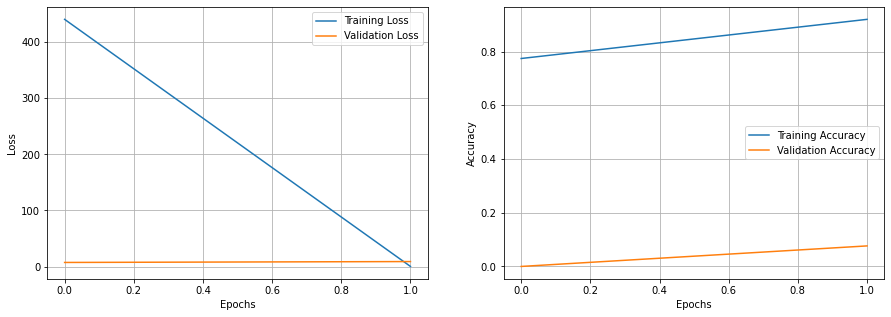

In [22]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

['Control', 'PD']
(522, 512, 512) (522,)
(522, 2)
17/17 [==============================] - 20s 1s/step - loss: 2.4133 - accuracy: 0.6533
              precision    recall  f1-score   support

           0       0.62      0.74      0.67       252
           1       0.70      0.57      0.63       270

    accuracy                           0.65       522
   macro avg       0.66      0.66      0.65       522
weighted avg       0.66      0.65      0.65       522

[[186  66]
 [115 155]]


<AxesSubplot:>

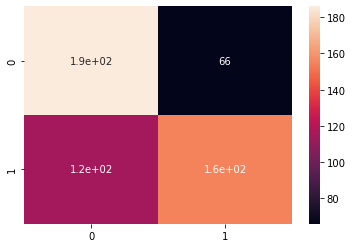

In [23]:
test_data,test_labels = readTrainingData(testImages)
x_test,y_test = arrayConversion(test_data,test_labels)
y_test = categoricalConversion(y_test)
model.evaluate(x_test,y_test)
predictions = model.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)
print(classification_report(test_labels, pred))
print(confusion_matrix(test_labels, pred))
sns.heatmap(confusion_matrix(test_labels, pred), annot=True)

In [25]:
img = pydicom.dcmread(r"C:\Nikhil drive\Mtech\mini project\Data\Test\Control\PPMI_3201_MR_axial_spgr_br_raw_20110318145751801_30_S101957_I224304.dcm")
img_array = img.pixel_array
img_array = cv.resize(img_array,(512,512))
model_out = model.predict(img_array.reshape(1,512,512))[0]
         
if np.argmax(model_out) == 1: str_label ='Parkinsons'
else: str_label ='No Parkinsons'
print("The predicted result is ", str_label)

The predicted result is  Parkinsons
